In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# only get data analyst job in india
df_DA_IND=df[(df['job_title_short']== 'Data Analyst') & (df['job_country']=='India')].copy()

# drop NaN values
df_DA_IND=df_DA_IND.dropna(subset=['salary_year_avg'])

In [8]:
df_DA_IND=df_DA_IND.explode('job_skills')

df_DA_IND[['job_skills','salary_year_avg']]

,job_skills,salary_year_avg
11412,python,50400.0
11412,sql,50400.0
11412,aws,50400.0
11412,azure,50400.0
11412,excel,50400.0
...,...,...
777313,looker,111202.0
777313,powerpoint,111202.0
784033,power bi,111175.0
784033,tableau,111175.0


In [17]:
df_DA_IND_group=df_DA_IND.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay= df_DA_IND_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills= df_DA_IND_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median', ascending=False)
df_DA_skills

,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


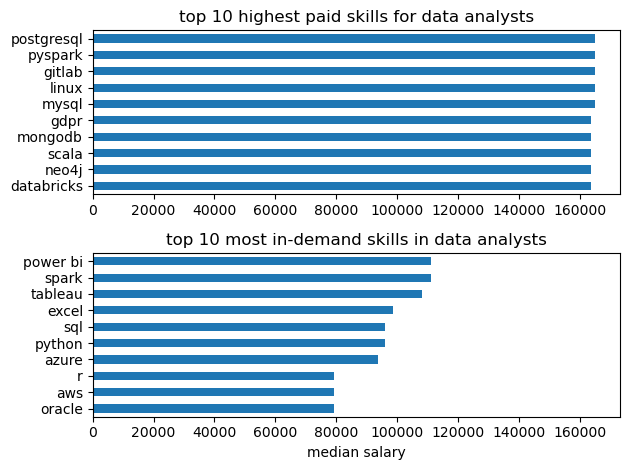

In [25]:
#subplot function

fig, ax =plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('top 10 highest paid skills for data analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1],legend=False)
ax[1].set_title('top 10 most in-demand skills in data analysts')
ax[1].set_xlabel('median salary')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()

In [26]:
import seaborn as sns